Macro F1 for classes 1,2,3: 0.2909
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      6983
           1       0.06      0.47      0.11        15
           2       0.04      0.50      0.08         8
           3       0.00      0.00      0.00         7

    accuracy                           0.96      7013
   macro avg       0.28      0.48      0.29      7013
weighted avg       1.00      0.96      0.98      7013

Confusion Matrix:
[[6755   95   78   55]
 [   0    7    5    3]
 [   0    4    4    0]
 [   0    5    2    0]]


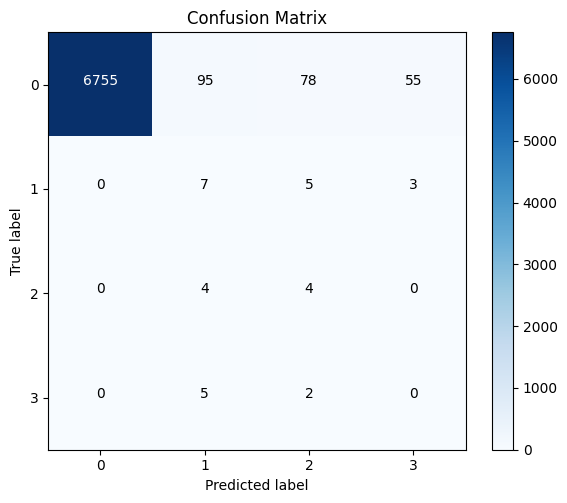

In [1]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# 1. Load data
df = pd.read_csv("C:\\Users\\taduc\\Downloads\\SAP-CONUHACKS-IX\\Data\\Preprocessed_2\\training_df.csv")
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes

X = df.drop(columns=["severity"]).values
y = df["severity"].values

# 2. Split the data (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Balance training set using RandomUnderSampler and SMOTE
counter = collections.Counter(y_train)
if 0 in counter:
    target_majority = max([counter[c] for c in counter if c != 0])
else:
    target_majority = 0

under_sampler = RandomUnderSampler(sampling_strategy={0: target_majority}, random_state=42)
smote = SMOTE(sampling_strategy='not majority', random_state=42)
resample_pipeline = Pipeline(steps=[('under', under_sampler), ('smote', smote)])
X_train_bal, y_train_bal = resample_pipeline.fit_resample(X_train, y_train)

# 4. Create and train the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_bal, y_train_bal)

# 5. Evaluate on the validation set
y_val_pred = clf.predict(X_val)

# Compute macro F1 for classes 1,2,3
mask = y_val > 0  # classes 1,2,3 are minority
if mask.any():
    macro_f1 = f1_score(y_val[mask], y_val_pred[mask], average='macro', labels=[1, 2, 3])
else:
    macro_f1 = 0.0
print("Macro F1 for classes 1,2,3: {:.4f}".format(macro_f1))

print("Classification Report:")
print(classification_report(y_val, y_val_pred, labels=[0, 1, 2, 3]))

cm = confusion_matrix(y_val, y_val_pred, labels=[0, 1, 2, 3])
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix using matplotlib
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(4)
plt.xticks(tick_marks, [0, 1, 2, 3])
plt.yticks(tick_marks, [0, 1, 2, 3])
plt.xlabel("Predicted label")
plt.ylabel("True label")

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

C:\Users\taduc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [00:48:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Macro F1 for classes 1,2,3: 0.3594
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      6983
           1       0.02      0.33      0.04        15
           2       0.01      0.50      0.02         8
           3       0.01      0.29      0.02         7

    accuracy                           0.89      7013
   macro avg       0.26      0.50      0.26      7013
weighted avg       1.00      0.89      0.94      7013

Confusion Matrix:
[[6233  221  348  181]
 [   0    5    6    4]
 [   0    4    4    0]
 [   0    3    2    2]]


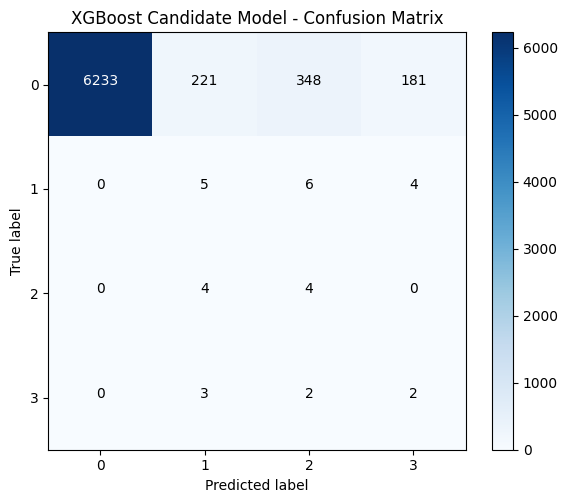

In [3]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# 1. Load data
df = pd.read_csv("C:\\Users\\taduc\\Downloads\\SAP-CONUHACKS-IX\\Data\\Preprocessed_2\\training_df.csv")
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes

X = df.drop(columns=["severity"]).values
y = df["severity"].values

# 2. Split the data (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Balance training set using under-sampling and SMOTE
counter = collections.Counter(y_train)
if 0 in counter:
    target_majority = max([counter[c] for c in counter if c != 0])
else:
    target_majority = 0

under_sampler = RandomUnderSampler(sampling_strategy={0: target_majority}, random_state=42)
smote = SMOTE(sampling_strategy='not majority', random_state=42)
resample_pipeline = Pipeline(steps=[('under', under_sampler), ('smote', smote)])
X_train_bal, y_train_bal = resample_pipeline.fit_resample(X_train, y_train)

# 4. Create and train an XGBoost candidate model
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, 
                        use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train_bal, y_train_bal)

# 5. Evaluate the model on the validation set
y_val_pred = xgb_clf.predict(X_val)

# Compute macro F1 for classes 1,2,3
mask = y_val > 0
if mask.any():
    macro_f1 = f1_score(y_val[mask], y_val_pred[mask], average='macro', labels=[1, 2, 3])
else:
    macro_f1 = 0.0
print("Macro F1 for classes 1,2,3: {:.4f}".format(macro_f1))

print("Classification Report:")
print(classification_report(y_val, y_val_pred, labels=[0, 1, 2, 3]))

cm = confusion_matrix(y_val, y_val_pred, labels=[0, 1, 2, 3])
print("Confusion Matrix:")
print(cm)

# 6. Visualize the confusion matrix using matplotlib
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("XGBoost Candidate Model - Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(4)
plt.xticks(tick_marks, [0, 1, 2, 3])
plt.yticks(tick_marks, [0, 1, 2, 3])
plt.xlabel("Predicted label")
plt.ylabel("True label")

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()